# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [82]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [83]:
# Importing CarPrice_Assignment.csv
carprice = pd.DataFrame(pd.read_csv('CarPrice_Assignment.csv'))

In [84]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [85]:
# Any missing values?
carprice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [86]:
carprice.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [87]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [88]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [89]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
carprice["fueltype"]=labelencoder.fit_transform(carprice["fueltype"])
carprice["aspiration"]=labelencoder.fit_transform(carprice["aspiration"])
carprice["carbody"]=labelencoder.fit_transform(carprice["carbody"])
carprice["drivewheel"]=labelencoder.fit_transform(carprice["drivewheel"])
carprice["enginetype"]=labelencoder.fit_transform(carprice["enginetype"])
carprice["cylindernumber"]=labelencoder.fit_transform(carprice["cylindernumber"])
carprice["enginelocation"]=labelencoder.fit_transform(carprice["enginelocation"])
carprice["CarName"]=labelencoder.fit_transform(carprice["CarName"])
carprice["doornumber"]=labelencoder.fit_transform(carprice["doornumber"])
carprice["fuelsystem"]=labelencoder.fit_transform(carprice["fuelsystem"])

In [90]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
mean = carprice[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]].mean(axis=0)
carprice[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]] -= mean
std = carprice[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]].std(axis=0)
carprice[["wheelbase","carlength",	"carwidth"	,"carheight"	,"curbweight" ,"enginesize" , "boreratio"	,"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg"	,"highwaympg"]] /= std
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,-1.686643,...,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,13495.0
1,2,3,3,1,0,1,0,2,0,-1.686643,...,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,16500.0
2,3,1,1,1,0,1,2,2,0,-0.706865,...,0.602571,5,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,16500.0
3,4,2,4,1,0,0,3,1,0,0.173274,...,-0.430023,5,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,13950.0
4,5,2,5,1,0,0,3,0,0,0.106848,...,0.218350,5,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,17450.0


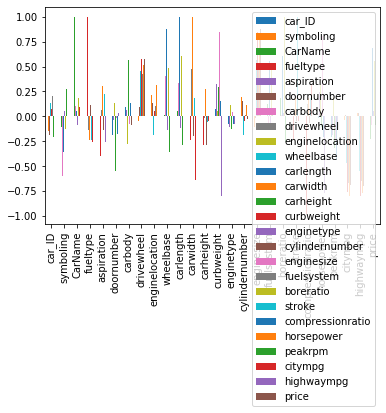

In [92]:
a =carprice.corr()
a.plot(kind="bar")

In [93]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,-1.686643,...,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,13495.0
1,2,3,3,1,0,1,0,2,0,-1.686643,...,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,16500.0
2,3,1,1,1,0,1,2,2,0,-0.706865,...,0.602571,5,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,16500.0
3,4,2,4,1,0,0,3,1,0,0.173274,...,-0.430023,5,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,13950.0
4,5,2,5,1,0,0,3,0,0,0.106848,...,0.218350,5,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,17450.0


In [94]:
carprice.drop(["car_ID"],axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,-1.686643,-0.425480,...,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,13495.0
1,3,3,1,0,1,0,2,0,-1.686643,-0.425480,...,0.074267,5,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,16500.0
2,1,1,1,0,1,2,2,0,-0.706865,-0.230948,...,0.602571,5,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,16500.0
3,2,4,1,0,0,3,1,0,0.173274,0.206750,...,-0.430023,5,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,13950.0
4,2,5,1,0,0,3,0,0,0.106848,0.206750,...,0.218350,5,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,1.717669,1.195622,...,0.338419,5,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512,16845.0
201,-1,138,1,1,0,3,2,0,1.717669,1.195622,...,0.338419,5,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151,19045.0
202,-1,140,1,0,0,3,2,0,1.717669,1.195622,...,1.106861,5,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577,21485.0
203,-1,142,0,1,0,3,2,0,1.717669,1.195622,...,0.434474,3,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725,22470.0


In [95]:
X = carprice.loc[:,"symboling":"highwaympg"]

In [96]:
Y=carprice["price"]

In [97]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Splitting train and test dataset into 70:30 percent ratio.
df_train, df_test = train_test_split(carprice, train_size=0.7,test_size = 0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 26)
(62, 26)


In [133]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Score: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))

Score:  0.9132575034246884
Train R2 score:  0.9132575034246884
Test R2 score:  0.8329073180723702


In [124]:
y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

In [125]:

## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.9132575034246884
R-sqaure on test data: 0.8329073180723702
RMSE on train data: 2358.754358550657
RMSE on test data: 3218.344189281444


In [126]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]
    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

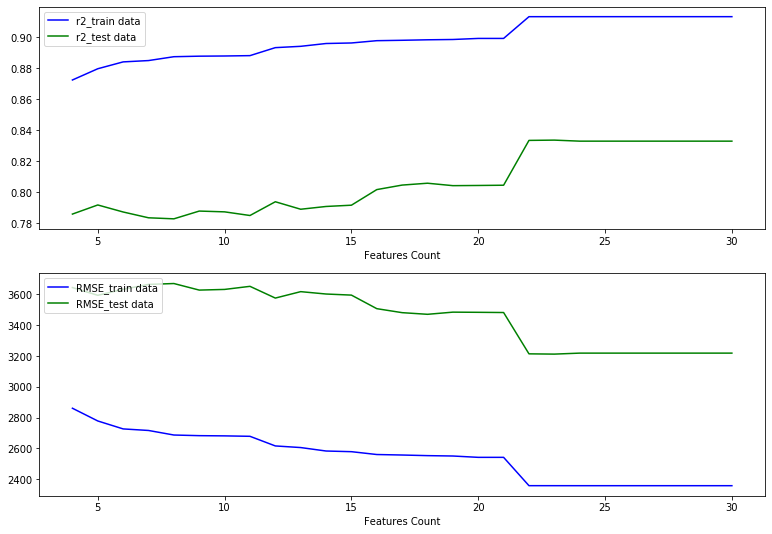

In [127]:
# plotting r2 and RMSE against n_features
fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')
ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

In [128]:
lm=LinearRegression()
rfe=RFE(lm,13)
rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_] #obtaining fetaure names of 13 most imp 

#making new Df's with  13 most imp features as per RFE algorithm
X_train_13= X_train[col]
X_test_13 = X_test[col]


# add a constant to the model
X_train_13 = sm.add_constant(X_train_13,has_constant='add')
X_test_13 = sm.add_constant(X_test_13,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,X_train_13).fit()


#making predictions
y_pred_train=lm_sm.predict(X_train_13)
y_pred_test=lm_sm.predict(X_test_13)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)
#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())

----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.6354079083208939
R-sq for train data is 0.894118924596291
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 3616.92412689961
RMSE for train data is 2606.0091047070136
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     83.80
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.81e-56
Time:                        15:58:37   Log-Likelihood:                -1327.7
No. Observations:                 143   AIC:                             2683.
Df Residuals:                     129   BIC:                             2725.
Df Model:                          13         

Text(0.5, 0, 'Index')

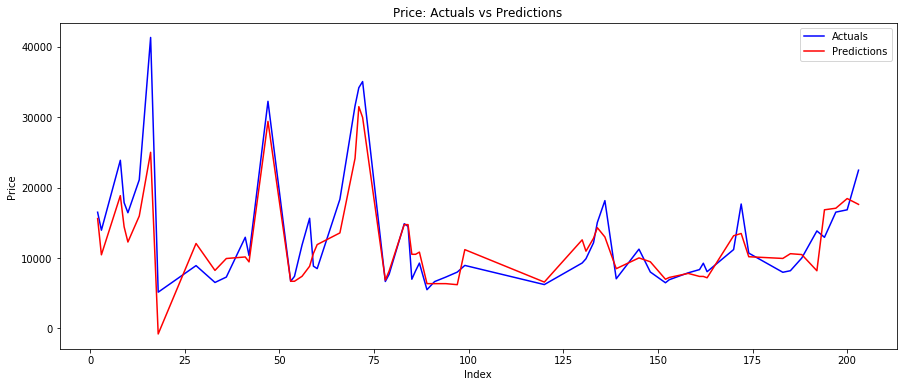

In [129]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

In [130]:

#grabbing important features 
features_13=lm_sm.params.index
features_13=features_13[1:] #we don't want constant (const) in our imp features list so removing it
features_13

Index(['fueltype', 'doornumber', 'drivewheel', 'enginelocation', 'carlength',
       'carwidth', 'carheight', 'enginesize', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [131]:
X_train[features_13].head(2)

,fueltype,doornumber,drivewheel,enginelocation,carlength,carwidth,carheight,enginesize,stroke,compressionratio,peakrpm,citympg,highwaympg
202,1,0,2,0,1.195622,1.394830,0.726460,1.106861,-1.229012,-0.337997,0.785932,-1.103540,-1.125577
32,1,1,1,0,-1.949316,-0.889335,-0.460351,-1.150438,-0.591251,-0.010709,0.785932,1.953563,1.633467
